# HAFS

This tutorial shows you how to download HAFS data from NOMADS with the Herbie Python package.

- [HAFS Model Homepage](https://wpo.noaa.gov/the-hurricane-analysis-and-forecast-system-hafs/)
- [Hurricane Forecast Improvement Program](https://hfip.org/hafs)

The HAFS model comes in two flavors

- HAFS-A; In Herbie, set `model="hafsa"`
- HAFS-B; In Herbie, set `model="hafsb"`

What's the difference? According to [AndyHazelton](https://twitter.com/AndyHazelton/status/1700164995407839363?ref_src=twsrc%5Etfw)

> They use different physics (HAFS-A GFDL microphysics, HAFS-B Thompson, and HAFS-B uses the tc-pbl option @XiaominChen7 and I worked on).

You must supply the `storm=<stormName_or_ID>` to Herbie.


In [1]:
from herbie import Herbie
from toolbox import EasyMap, pc
from paint.standard2 import cm_tmp, cm_wind

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

You can get a Herbie for a storm by its ID or Name


In [21]:
H = Herbie("2023-9-9", model="hafsa", fxx=12, storm="lee")
H.storm, H.storm_name

✅ Found ┊ model=hafsa ┊ product=storm.atm ┊ 2023-Sep-09 00:00 UTC F12 ┊ GRIB2 @ nomads ┊ IDX @ nomads


('13l', 'lee')

In [22]:
H = Herbie("2023-9-9", model="hafsa", fxx=12, storm="11e")
H.storm, H.storm_name

✅ Found ┊ model=hafsa ┊ product=storm.atm ┊ 2023-Sep-09 00:00 UTC F12 ┊ GRIB2 @ nomads ┊ IDX @ nomads


('11e', 'jova')

Ok, let's get and plot some HAFS data!


In [2]:
H = Herbie("2023-9-9", model="hafsa", fxx=12, storm="lee")

✅ Found ┊ model=hafsa ┊ product=storm.atm ┊ 2023-Sep-09 00:00 UTC F12 ┊ GRIB2 @ nomads ┊ IDX @ nomads


In [3]:
H.inventory("WIND")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
698,699,220591614,220881145,220591614-220881145,2023-09-09,2023-09-09 12:00:00,WIND,10 m above ground,11-12 hour max fcst,:WIND:10 m above ground:11-12 hour max fcst


In [4]:
H.PRODUCTS

{'storm.atm': '13L-Lee',
 'storm.sat': '13L-Lee',
 'parent.atm': '13L-Lee',
 'parent.sat': '13L-Lee',
 'parent.swath': '13L-Lee',
 'ww3': '13L-Lee'}

In [5]:
ds = H.xarray("WIND")
ds

curl -s --range 220591614-220881145 "https://nomads.ncep.noaa.gov/pub/data/nccf/com/hafs/prod/hfsa.20230909/00/13l.2023090900.hfsa.storm.atm.f012.grb2" > "/home/blaylock/data/hafsa/20230909/subset_71128152__13l.2023090900.hfsa.storm.atm.f012.grb2"


<xarray.Dataset>
Dimensions:              (latitude: 801, longitude: 1001)
Coordinates:
    time                 datetime64[ns] 2023-09-09
    step                 timedelta64[ns] 12:00:00
    heightAboveGround    float64 10.0
  * latitude             (latitude) float64 12.12 12.13 12.15 ... 28.09 28.11
  * longitude            (longitude) float64 292.3 292.4 292.4 ... 312.3 312.3
    valid_time           datetime64[ns] 2023-09-09T12:00:00
Data variables:
    si10                 (latitude, longitude) float32 nan nan nan ... nan nan
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hafsa
    product:                 storm.atm
    description:             Hurricane Analysis and Forecast System (HAFS-A) ...
    remote_grib:             https://nomads.ncep.noaa.gov/pub/data/nccf/com/h...
    local_grib:              /home/blaylock/data/hafsa/20230909/subset_711281...
    search:            WIND

Text(1.0, 1.0, '10 metre wind speed')

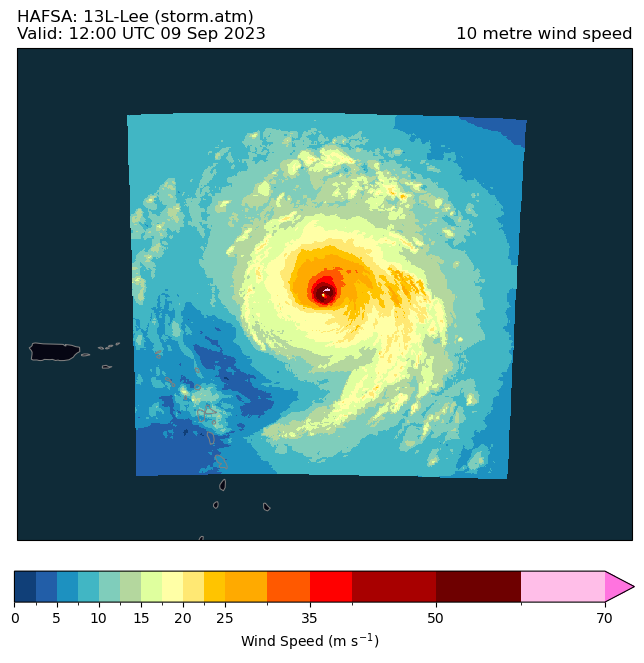

In [6]:
ax = (
    EasyMap("50m", crs=ds.herbie.crs, figsize=[8, 8], dark=True)
    .OCEAN()
    .LAND()
    .STATES()
    .ax
)
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.si10, transform=pc, **cm_wind().cmap_kwargs
)
plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.05, **cm_wind().cbar_kwargs)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description} ({H.product})\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.si10.GRIB_name, loc="right")

You can also get the HAFS-B data


In [7]:
H = Herbie("2023-9-9", model="hafsb", fxx=12, storm="lee")

✅ Found ┊ model=hafsb ┊ product=storm.atm ┊ 2023-Sep-09 00:00 UTC F12 ┊ GRIB2 @ nomads ┊ IDX @ nomads


curl -s --range 217405795-217676933 "https://nomads.ncep.noaa.gov/pub/data/nccf/com/hafs/prod/hfsb.20230909/00/13l.2023090900.hfsb.storm.atm.f012.grb2" > "/home/blaylock/data/hafsb/20230909/subset_71128152__13l.2023090900.hfsb.storm.atm.f012.grb2"


Text(1.0, 1.0, '10 metre wind speed')

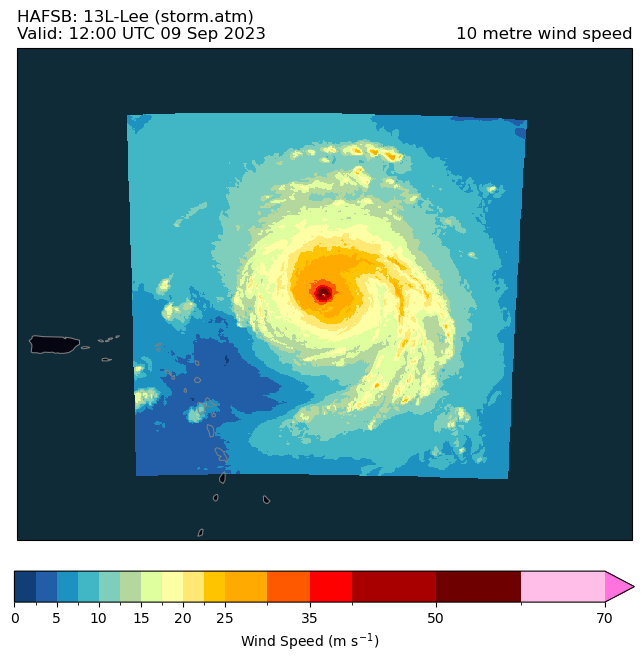

In [8]:
dsb = H.xarray("WIND")
ax = (
    EasyMap("50m", crs=dsb.herbie.crs, figsize=[8, 8], dark=True)
    .OCEAN()
    .LAND()
    .STATES()
    .ax
)
p = ax.pcolormesh(
    dsb.longitude, dsb.latitude, dsb.si10, transform=pc, **cm_wind().cmap_kwargs
)
plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.05, **cm_wind().cbar_kwargs)

ax.set_title(
    f"{dsb.model.upper()}: {H.product_description} ({H.product})\nValid: {dsb.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(dsb.si10.GRIB_name, loc="right")

And we can show the difference between the two models


Text(1.0, 1.0, '10 metre wind speed')

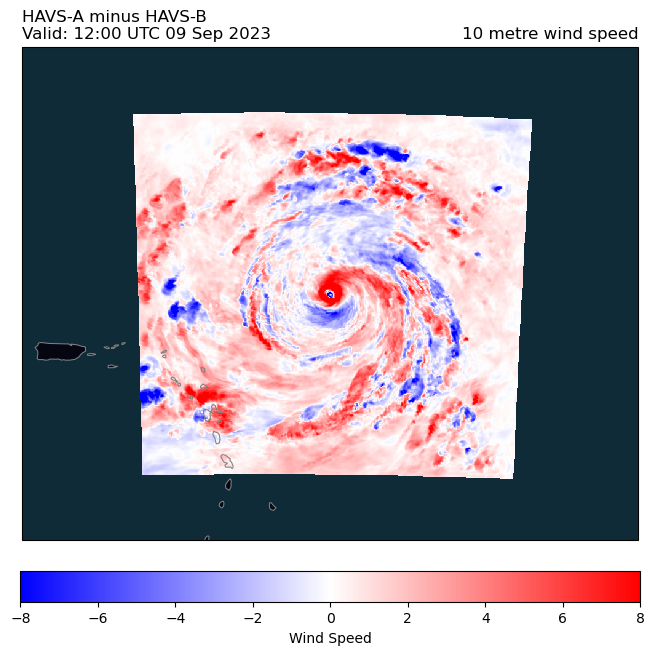

In [9]:
ax = (
    EasyMap("50m", crs=dsb.herbie.crs, figsize=[8, 8], dark=True)
    .OCEAN()
    .LAND()
    .STATES()
    .ax
)
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    (ds.si10.values - dsb.si10.values),
    transform=pc,
    cmap="bwr",
    vmax=8,
    vmin=-8,
)
plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.05, label="Wind Speed")

ax.set_title(
    f"HAVS-A minus HAVS-B\nValid: {dsb.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(dsb.si10.GRIB_name, loc="right")

In [10]:
ds

<xarray.Dataset>
Dimensions:              (latitude: 801, longitude: 1001)
Coordinates:
    time                 datetime64[ns] 2023-09-09
    step                 timedelta64[ns] 12:00:00
    heightAboveGround    float64 10.0
  * latitude             (latitude) float64 12.12 12.13 12.15 ... 28.09 28.11
  * longitude            (longitude) float64 292.3 292.4 292.4 ... 312.3 312.3
    valid_time           datetime64[ns] 2023-09-09T12:00:00
Data variables:
    si10                 (latitude, longitude) float32 nan nan nan ... nan nan
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hafsa
    product:                 storm.atm
    description:             Hurricane Analysis and Forecast System (HAFS-A) ...
    remote_grib:             https://nomads.ncep.noaa.gov/pub/data/nccf/com/h...
    local_grib:              /home/blaylock/data/hafsa/20230909/subset_711281...
    search:            WIND

There might be a better way to do this, but you can drop the NAN values around the perimeter of the domain like this...


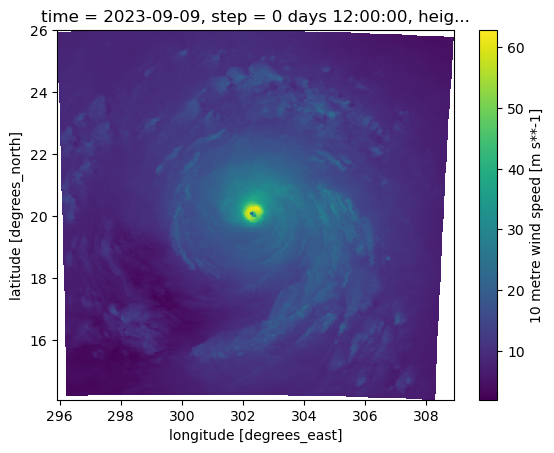

In [11]:
ds.dropna(dim="latitude", how="all").dropna(dim="longitude", how="all").si10.plot()

## What if I don't know what "storms" are available?


In [15]:
from herbie.models.hafs import Storms

In [18]:
# Get a dict of storm ids and storm names.
Storms().id_to_name

{'99w': 'invest',
 '14l': 'margot',
 '13l': 'lee',
 '10w': 'haikui',
 '12w': 'yun-yeung',
 '09w': 'saola',
 '11e': 'jova'}

In [14]:
# herbie will also tell you if you ask for a storm that is unknown
H = Herbie("2023-9-9", model="hafsa", fxx=12, storm="test")

ValueError: `storm` should be one of dict_keys(['invest', 'margot', 'lee', 'haikui', 'yun-yeung', 'saola', 'jova'])